In [16]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [17]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [18]:
from src import image_metrics, io_utils

# Filtering by aspect ratio

I assumed that files that I am interested in - nice tiles with nothing else - are square. Of course, this filerting step is not enough on it's own, but it is designed to filter out some garbage.

I allow up to 10% leeway to capture images with captions and etc.

The results showed that this step also disregards a type of images, that are desirable: consisting of `n x m` tiles with `n != m`. In the end I decided to just crop image to square form, and use other selection criterias.

In [20]:
folder_list = [
    'dataset/google/azulejo',
    'dataset/google/portuguese tiles',
    'dataset/bing/azulejo',
    'dataset/bing/portuguese tile',
    'dataset/bing/azulejo vector',
    'dataset/bing/portuguese tile vector'
]

Working on dataset/google/azulejo folder.
Aspect ratios of the images


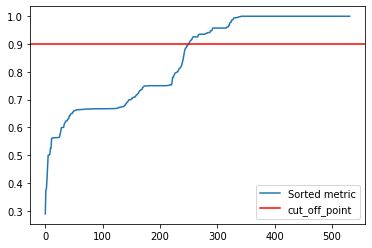

Random sample of rectangular files:


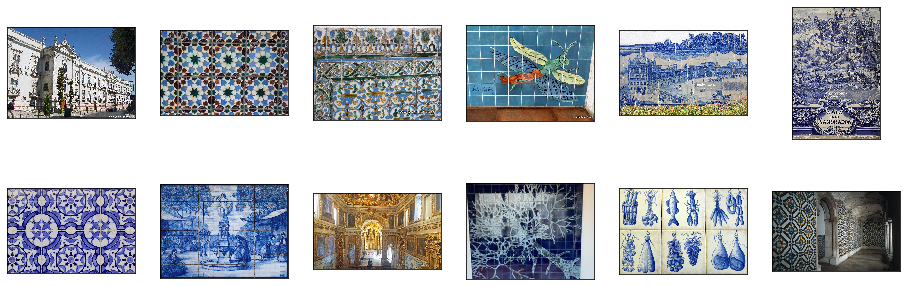

Random sample of square-ish files:


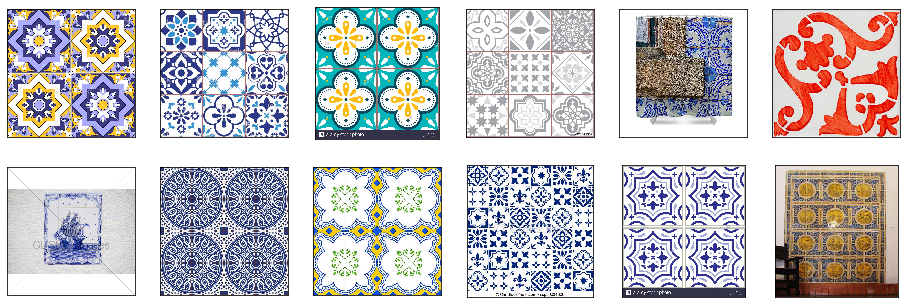

Total files: 532, out of them square-ish: 282.



Working on dataset/google/portuguese tiles folder.
Aspect ratios of the images


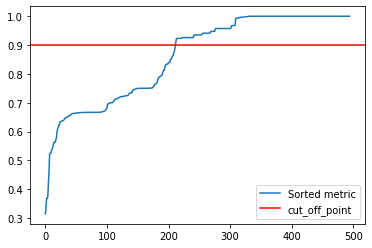

Random sample of rectangular files:


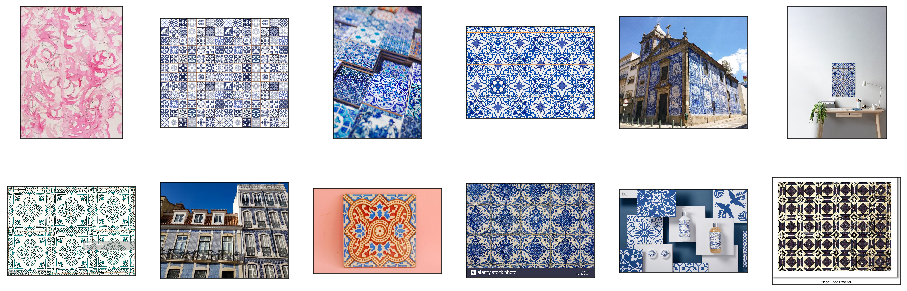

Random sample of square-ish files:


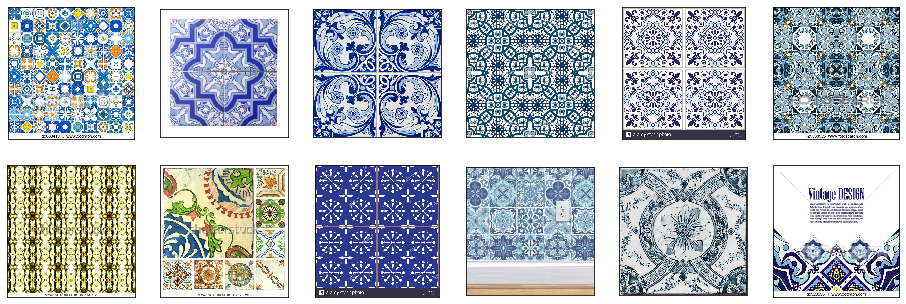

Total files: 495, out of them square-ish: 283.



Working on dataset/bing/azulejo folder.
Aspect ratios of the images


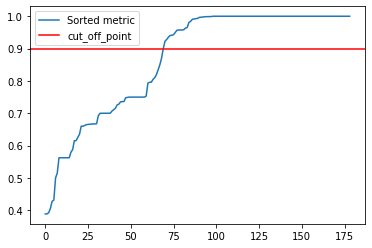

Random sample of rectangular files:


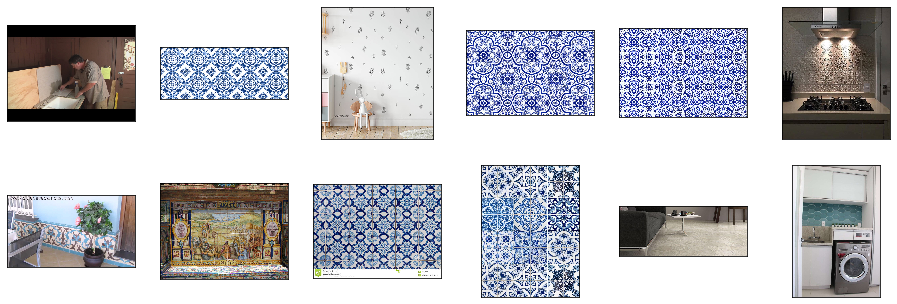

Random sample of square-ish files:


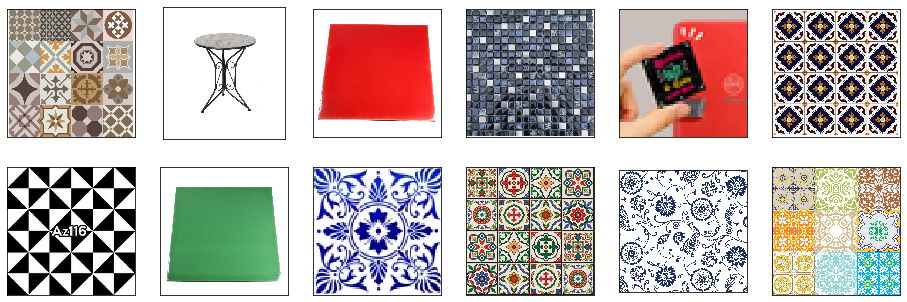

Total files: 179, out of them square-ish: 110.



Working on dataset/bing/portuguese tile folder.
Aspect ratios of the images


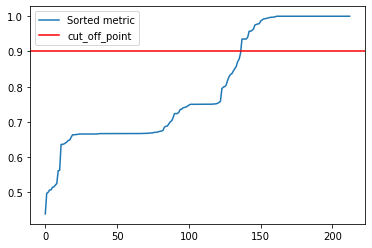

Random sample of rectangular files:


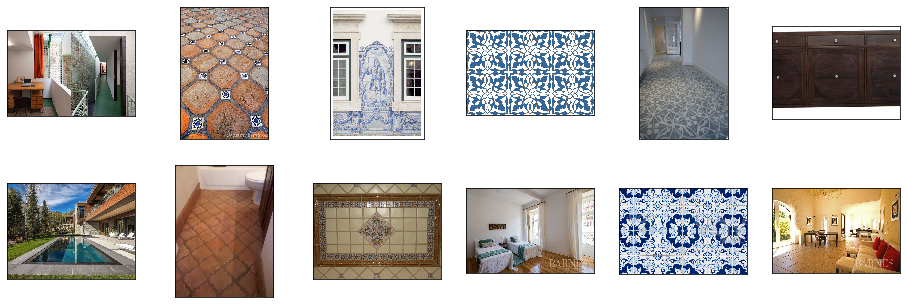

Random sample of square-ish files:


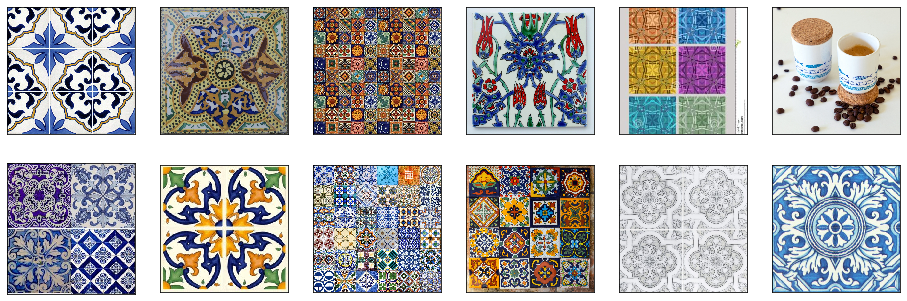

Total files: 213, out of them square-ish: 76.



Working on dataset/bing/azulejo vector folder.
Aspect ratios of the images


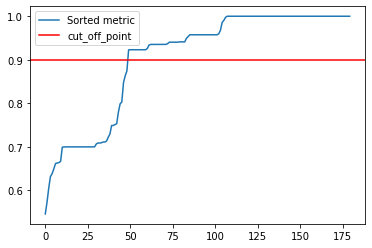

Random sample of rectangular files:


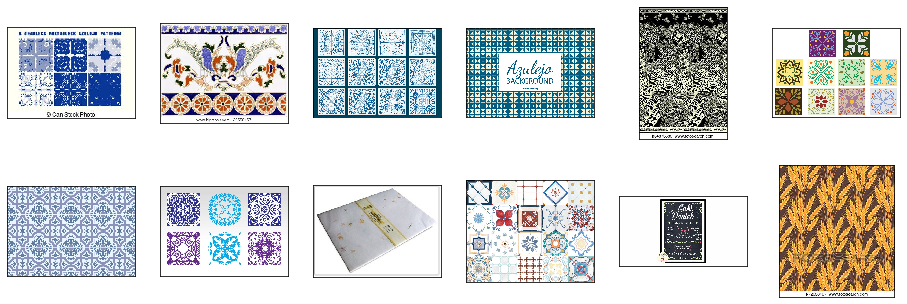

Random sample of square-ish files:


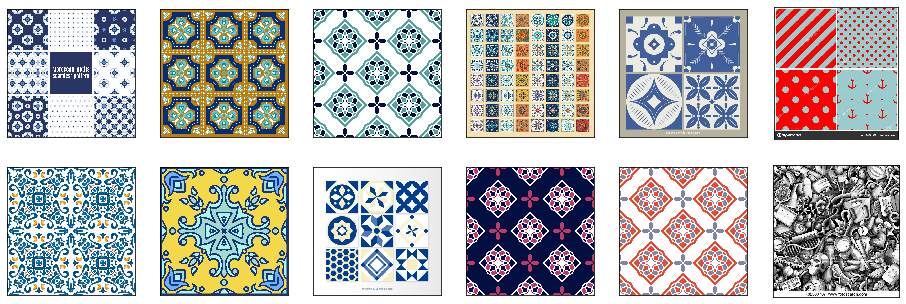

Total files: 180, out of them square-ish: 131.



Working on dataset/bing/portuguese tile vector folder.
Aspect ratios of the images


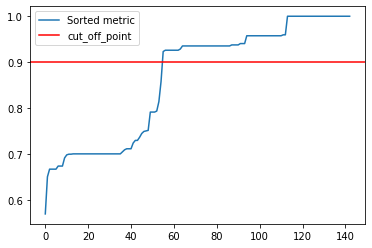

Random sample of rectangular files:


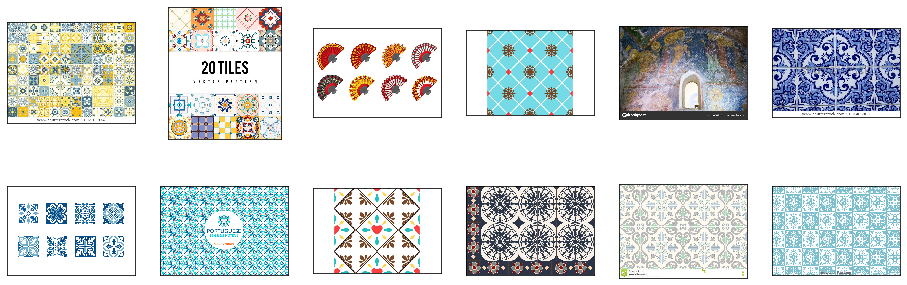

Random sample of square-ish files:


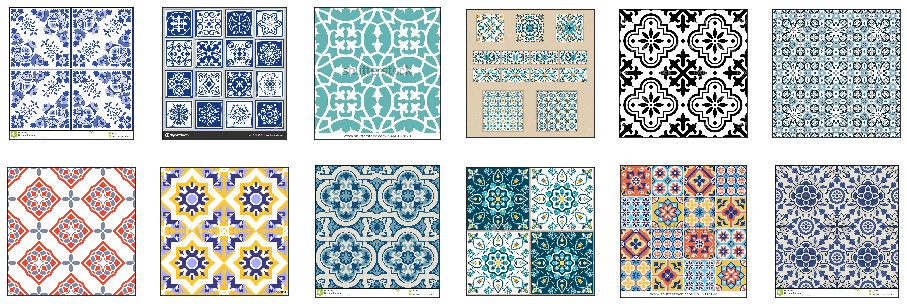

Total files: 143, out of them square-ish: 88.





In [21]:
plot_sample = 12
cut_off = 0.9

for folder in folder_list:
    print('Working on {} folder.'.format(folder))
    files = [_ for _ in os.listdir(folder)  if _.endswith(".jpg")]
    
    imgs = io_utils.read_imgs(files, folder)
    aspect_ratios = list(map(image_metrics.image_aspect_ratio, imgs))
    
    print('Aspect ratios of the images')
    io_utils.plot_metric(aspect_ratios, cut_off)
    
    sample_square = [_[0] for _ in zip(files, aspect_ratios) if _[1] >= cut_off]
    sample_rectangular = [_ for _ in files if _ not in sample_square]
    
    print('Random sample of rectangular files:')
    io_utils.plot_sample_files(sample_rectangular, folder=folder, plot_sample=plot_sample)
    
    print('Random sample of square-ish files:')
    io_utils.plot_sample_files(sample_square, folder=folder, plot_sample=plot_sample)
    
    print('Total files: {}, out of them square-ish: {}.'.format(len(files), len(sample_square)))
    
    with open('lists/square_{}.txt'.format(folder.replace('/', '-')), 'w') as filehandle:
        for filename in sample_square:
            filehandle.write('%s\n' % filename)
            
    print('\n\n')